<a href="https://colab.research.google.com/github/NiceTry-NiceTry/Responsi-Pengolahan-Sinyal-Digital/blob/main/Kode%20Program%20Responsi%20PSD-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Siapkan Dataset
import gdown
file_id = '1aFvFbShnfyxT3mV9AJ4BEhjx_elJfmVp'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Dataset.zip', quiet=False)
!unzip Dataset.zip


Downloading...
From (original): https://drive.google.com/uc?id=1aFvFbShnfyxT3mV9AJ4BEhjx_elJfmVp
From (redirected): https://drive.google.com/uc?id=1aFvFbShnfyxT3mV9AJ4BEhjx_elJfmVp&confirm=t&uuid=01e3f288-5ca5-4224-833a-9b7a0b817f89
To: /content/Dataset.zip
100%|██████████| 289M/289M [00:02<00:00, 117MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: Dataset1/Train/Real/real_9557.jpg  
  inflating: Dataset1/Train/Real/real_9558.jpg  
  inflating: Dataset1/Train/Real/real_9559.jpg  
  inflating: Dataset1/Train/Real/real_956.jpg  
  inflating: Dataset1/Train/Real/real_9560.jpg  
  inflating: Dataset1/Train/Real/real_9561.jpg  
  inflating: Dataset1/Train/Real/real_9562.jpg  
  inflating: Dataset1/Train/Real/real_9563.jpg  
  inflating: Dataset1/Train/Real/real_9564.jpg  
  inflating: Dataset1/Train/Real/real_9565.jpg  
  inflating: Dataset1/Train/Real/real_9566.jpg  
  inflating: Dataset1/Train/Real/real_9567.jpg  
  inflating: Dataset1/Train/Real/real_9568.jpg  
  inflating: Dataset1/Train/Real/real_9569.jpg  
  inflating: Dataset1/Train/Real/real_957.jpg  
  inflating: Dataset1/Train/Real/real_9570.jpg  
  inflating: Dataset1/Train/Real/real_9571.jpg  
  inflating: Dataset1/Train/Real/real_9572.jpg  
  inflating: Dataset1/Train/Real/real_9573.jpg  
  inflating: Dataset

In [ ]:
#import import
#sarjana import
import tensorflow as tf
from tensorflow.keras.layers import Input, Layer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Activation, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,recall_score, f1_score
import os
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#siapkan data untuk training, validasi, dan tes
dir = "/content/Dataset1"
train_dir = os.path.join(dir,'Train/')
val_dir = os.path.join(dir,'Validation/')
test_dir = os.path.join(dir,'Test/')

In [ ]:
img_size = 224
batch_size = 64 #//

train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print(f"Total data Training: {train_gen.samples}")
print(f"Total data Validasi: {val_gen.samples}")
print(f"Total data Test: {test_gen.samples}")

Found 21006 images belonging to 2 classes.
Found 4506 images belonging to 2 classes.
Found 4506 images belonging to 2 classes.
Total data Training: 21006
Total data Validasi: 4506
Total data Test: 4506


In [ ]:
#load model #//

model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
model.trainable = False

for layer in model.layers[-30:]:
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False # Keep BatchNormalization layers frozen for stability

x = model.output
x = GlobalAveragePooling2D()(x)       # Meratakan output (Flattening cerdas)
x = Dense(512, activation='relu')(x)  # Layer otak tambahan
x = Dropout(0.3)(x)                   #
x = Dense(256, activation='relu')(x)  # Layer otak tambahan
x = Dropout(0.3)(x)                   #
output = Dense(1, activation='sigmoid')(x) # Output akhir: 0 (Real) s.d 1 (Fake)
model = Model(inputs=model.input, outputs=output)
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  # Klasifikasi Biner (Real/Fake)
    metrics=['accuracy'])
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,768,385 (94.48 MB)

 Trainable params: 15,609,345 (59.54 MB)

 Non-trainable params: 9,159,040 (34.94 MB)

In [ ]:
#Train the model #//
checkpoint = ModelCheckpoint(
    'Deepfake_Resnet50_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='max'
)

history = model.fit(
    train_gen,
    epochs=10,
    validation_data = val_gen,
    callbacks=[checkpoint, early_stopping],
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.5100 - loss: 0.6997
Epoch 1: val_accuracy improved from -inf to 0.51620, saving model to Deepfake_Resnet50_model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 119s 292ms/step - accuracy: 0.5100 - loss: 0.6997 - val_accuracy: 0.5162 - val_loss: 0.6741
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.6179 - loss: 0.6575
Epoch 2: val_accuracy improved from 0.51620 to 0.80404, saving model to Deepfake_Resnet50_model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 80s 243ms/step - accuracy: 0.6180 - loss: 0.6574 - val_accuracy: 0.8040 - val_loss: 0.4563
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.7216 - loss: 0.5573
Epoch 3: val_accuracy improved from 0.80404 to 0.84731, saving model to Deepfake_Resnet50_model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 79s 241ms/step - accuracy: 0.7216 - loss: 0.5573 - val_accuracy: 0.8473 - val_loss: 0.4282
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.7475

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.5997 - loss: 0.7769
Test Loss: 0.5805330276489258
Test Accuracy: 0.7124999761581421


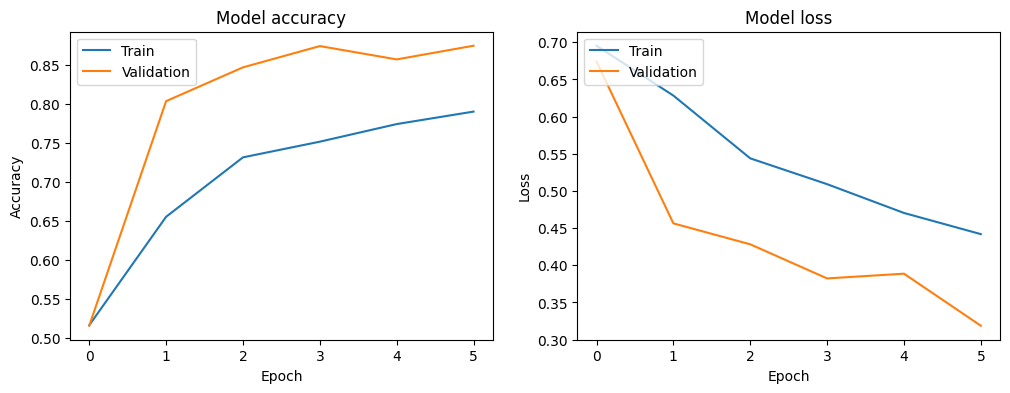

70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step

Classification Report:
              precision    recall  f1-score   support

        Fake       0.80      0.57      0.67      2253
        Real       0.66      0.86      0.75      2227

    accuracy                           0.71      4480
   macro avg       0.73      0.71      0.71      4480
weighted avg       0.73      0.71      0.71      4480



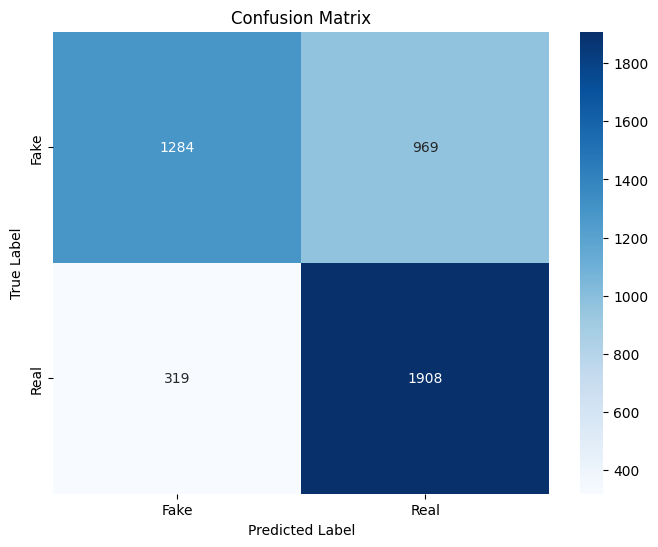

In [ ]:
#evaluasi model
test_loss, test_accuracy= model.evaluate(
    test_gen,
    steps=test_gen.samples // test_gen.batch_size,
)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
#Lihat History Fine-Tuning
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Make predictions on the test data
predictions = model.predict(test_gen, steps=test_gen.samples // test_gen.batch_size)
y_pred = np.round(predictions).flatten()

# Get true labels
y_true = test_gen.classes[:len(y_pred)]

# Get class names
class_names = list(test_gen.class_indices.keys())

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()